<a href="https://colab.research.google.com/github/denis-kezun/Exploratory-Data-Analysis/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Код

In [1]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive')

Mounted at /content/drive


##Data overview

In [2]:
df_events = pd.read_csv("/content/drive/MyDrive/Mate/events.csv")
print(f"Розмір датасету events: {df_events.shape}\n")
df_events.info()
df_events.head()

Розмір датасету events: (1330, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


In [3]:
df_countries = pd.read_csv("/content/drive/MyDrive/Mate/countries.csv")
print(f"\nРозмір датасету countries: {df_countries.shape}\n")
df_countries.info()
df_countries.head()



Розмір датасету countries: (249, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [4]:
df_products = pd.read_csv("/content/drive/MyDrive/Mate/products.csv")
print(f"\nРозмір датасету products: {df_products.shape}\n")
df_products.info()
df_products.head()


Розмір датасету products: (12, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


Було завантажено 3 датасета, описано зміст цих датасетів (за допомогою info()), та було знайдено розміри кожного датасета.
- Перша таблиця містить у собі інформацію про подію (замовлення), і має такі поля: дату замовлення та отримання, пріорітет замовлення, код країни, код товара, канал замовлення та дані про продажі (кількість продажів, ціна за одиницю товара та собівартість).
- Друга таблиця представляє інформацію про країну і має такі поля: повна назва країни, скорочені назви, регіон та під-регіон.
- Третя таблиця - таблиця товарів, зберігає інформацію про категорію замовлених товарів.

Таблиці поєднані наступним шляхом =>
- таблиці події та країн за полем код країни (Country Code) з таблиці events та скороченою назвою країни (alpha-3) з таблиці countries
- таблиці події та товарів за полем код товару (Product ID) з таблиці events та типом товара (item_type) з products

##Data cleaning

In [5]:
print(f"Пропущені записи у таблиці events:\n{df_events.isna().sum() / df_events.shape[0] * 100}")

Пропущені записи у таблиці events:
Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      6.165414
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.150376
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64


In [6]:
print(f"Пропущені записи у таблиці countries:\n{df_countries.isna().sum() / df_countries.shape[0] * 100}")

Пропущені записи у таблиці countries:
name          0.000000
alpha-2       0.401606
alpha-3       0.000000
region        0.401606
sub-region    0.401606
dtype: float64


In [7]:
print(f"Пропущені записи у таблиці products:\n{df_products.isna().sum() / df_products.shape[0] * 100}")

Пропущені записи у таблиці products:
id           0.0
item_type    0.0
dtype: float64


У таблиці events багато пропущених значень у полі Country Code, цілих 6.17%, це може бути спричинене ттим, що замовник не вказував країну під час замовлення. Можливо, кразе зробити це поле обов'язковим при замовленні. Пропущені дані заповнимо за допомогою методу ffill(), тобто заповнимо пропущені значення наступними.

У таблиціх countries та products невеликий відсоток пропусків.


In [8]:
df_events["Country Code"] = df_events["Country Code"].ffill()
print(f"Пропущені записи у таблиці events:\n{df_events.isna().sum() / df_events.shape[0] * 100}")

Пропущені записи у таблиці events:
Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      0.000000
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.150376
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64


Бачимо, що пропуски заповнені, всі інші пропущені значення з датасетів просто видалимо, бо їх кількість не велика та не відобразиться за результатах.

In [9]:
df_events_f = df_events.dropna()
df_countries_f = df_countries.dropna()
df_products_f = df_products.dropna()

print(f"Пропущені записи у таблиці events:\n{df_events_f.isna().sum() / df_events_f.shape[0] * 100}")
print(f"Пропущені записи у таблиці countries:\n{df_countries_f.isna().sum() / df_countries_f.shape[0] * 100}")
print(f"Пропущені записи у таблиці products:\n{df_products_f.isna().sum() / df_products_f.shape[0] * 100}")


Пропущені записи у таблиці events:
Order ID          0.0
Order Date        0.0
Ship Date         0.0
Order Priority    0.0
Country Code      0.0
Product ID        0.0
Sales Channel     0.0
Units Sold        0.0
Unit Price        0.0
Unit Cost         0.0
dtype: float64
Пропущені записи у таблиці countries:
name          0.0
alpha-2       0.0
alpha-3       0.0
region        0.0
sub-region    0.0
dtype: float64
Пропущені записи у таблиці products:
id           0.0
item_type    0.0
dtype: float64


Тепер ми можемо працювати з повними датасетами

В таблиці events треба змінити типи даних для полів Order Date та Ship Date на тип datetime(), поле Units Sold на тип int.
У інших таблиціх все нормально

In [11]:
df_events_f = df_events_f.copy()

df_events_f["Order Date"] = pd.to_datetime(df_events_f["Order Date"], dayfirst=False)
df_events_f["Ship Date"] = pd.to_datetime(df_events_f["Ship Date"], dayfirst=False)
df_events_f["Units Sold"] = df_events_f["Units Sold"].astype(int)
df_events_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1328 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1328 non-null   int64         
 1   Order Date      1328 non-null   datetime64[ns]
 2   Ship Date       1328 non-null   datetime64[ns]
 3   Order Priority  1328 non-null   object        
 4   Country Code    1328 non-null   object        
 5   Product ID      1328 non-null   int64         
 6   Sales Channel   1328 non-null   object        
 7   Units Sold      1328 non-null   int64         
 8   Unit Price      1328 non-null   float64       
 9   Unit Cost       1328 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(3)
memory usage: 114.1+ KB


In [13]:
datasets = {
    "events": df_events_f.copy(),
    "Country": df_countries_f.copy(),
    "Products": df_products_f.copy()
}
for name, df in datasets.items():
    for col in df.select_dtypes(include="object").columns:
        df.loc[:, col] = df[col].str.strip().str.replace(r"\s+", " ", regex=True).str.lower()

    initial_count = len(df)
    df.drop_duplicates(inplace=True)
    duplicates_removed = initial_count - len(df)

    print(f"Кількість видалених дублікатів у таблиці {name}: {duplicates_removed}")
    print(f"Кількість рядків після видалення дублікатів: {len(df)}")

Кількість видалених дублікатів у таблиці events: 0
Кількість рядків після видалення дублікатів: 1328
Кількість видалених дублікатів у таблиці Country: 0
Кількість рядків після видалення дублікатів: 247
Кількість видалених дублікатів у таблиці Products: 0
Кількість рядків після видалення дублікатів: 12


In [14]:
df_events_f.describe()


,Order ID,Order Date,Ship Date,Product ID,Units Sold,Unit Price,Unit Cost
count,1.328000e+03,1328,1328,1328.000000,1328.000000,1328.000000,1328.000000
mean,5.416231e+08,2013-10-11 22:28:54.939759104,2013-11-05 17:22:02.891566336,5787.775602,4952.201807,264.913245,187.211521
min,1.006406e+08,2010-01-01 00:00:00,2010-01-10 00:00:00,1270.000000,2.000000,9.330000,6.920000
25%,3.213291e+08,2011-12-14 06:00:00,2012-01-02 00:00:00,3127.000000,2356.750000,81.730000,35.840000
50%,5.399925e+08,2013-10-15 12:00:00,2013-11-05 12:00:00,5988.000000,4962.000000,154.060000,97.440000
75%,7.547357e+08,2015-08-29 12:00:00,2015-10-04 18:00:00,8681.000000,7459.500000,437.200000,263.330000
max,9.998797e+08,2017-07-23 00:00:00,2017-08-31 00:00:00,8969.000000,9999.000000,668.270000,524.960000
std,2.573496e+08,NaN,NaN,2820.635702,2905.198996,217.386320,176.187801


In [15]:
anomaly_date_order = df_events_f[df_events_f["Ship Date"] < df_events_f["Order Date"]]
print("Ship Date < Order Date:", len(anomaly_date_order))

valid_country_codes = set(df_countries_f["alpha-3"])
anomaly_country = df_events_f[~df_events_f["Country Code"].isin(valid_country_codes)]
print("Некоректні коди країн:", len(anomaly_country))

valid_product_ids = set(df_products_f["id"])
anomaly_product = df_events_f[~df_events_f["Product ID"].isin(valid_product_ids)]
print("Некоректні коди категорій:", len(anomaly_product))

Ship Date < Order Date: 0
Некоректні коди країн: 0
Некоректні коди категорій: 0


##Data analysis and visualization

Проведи з’єднання трьох таблиць в один датафрейм. Видали непотрібні для аналізу колонки. За потреби, зроби перейменування колонок.

In [16]:
df_countries_f = df_countries_f.rename(columns={"alpha-3": "Country Code"})
df_products_f = df_products_f.rename(columns={"id": "Product ID"})

res_table = pd.merge(df_events_f,df_countries_f, on = "Country Code", how = "left")
res_table = pd.merge(res_table, df_products_f, on ="Product ID", how = "left")

columns_to_drop = ["Country Code","Product ID", "alpha-2"]
res_table.drop(columns=columns_to_drop, inplace=True)
res_table.rename(columns={"name": "Country Name","region": "Region", "sub-region": "Sub-region", "item_type": "Product Category"},inplace=True)

res_table.loc[:, 'Country Name'] = res_table['Country Name'].str.title()
res_table.loc[:, 'Region'] = res_table['Region'].str.title()
res_table.loc[:, 'Sub-region'] = res_table['Sub-region'].str.title()
res_table.loc[:, 'Product Category'] = res_table['Product Category'].str.title()
res_table.loc[:, 'Order Priority'] = res_table['Order Priority'].str.title()
res_table.loc[:, 'Sales Channel'] = res_table['Sales Channel'].str.title()

res_table.head()

,Order ID,Order Date,Ship Date,Order Priority,Sales Channel,Units Sold,Unit Price,Unit Cost,Country Name,Region,Sub-region,Product Category
0,100640618,2014-10-08,2014-10-18,M,Online,650,205.70,117.11,Norway,Europe,Northern Europe,Cereal
1,100983083,2016-08-11,2016-08-11,C,Offline,1993,205.70,117.11,Serbia,Europe,Southern Europe,Cereal
2,101025998,2014-07-18,2014-08-11,M,Online,4693,668.27,502.54,Serbia,Europe,Southern Europe,Household
3,102230632,2017-05-13,2017-06-13,L,Online,1171,109.28,35.84,Montenegro,Europe,Southern Europe,Clothes
4,103435266,2012-08-11,2012-09-18,H,Offline,7648,47.45,31.79,Serbia,Europe,Southern Europe,Beverages


Загальна кількість замовлень

In [17]:
count_orders = res_table["Order ID"].count()
print(f"Загальна кількість замовлень: {count_orders}")

Загальна кількість замовлень: 1328


Загальний прибуток

In [ ]:
res_table["Profit"] = (res_table["Unit Price"] - res_table["Unit Cost"]) * res_table["Units Sold"]
total_profit = res_table["Profit"].sum()
print(f"Загальний прибуток складає: {total_profit}")

Загальний прибуток складає: 501434459.0


Загальна кількість охоплених країн

In [ ]:
count_country = len(res_table["Country Name"].unique())
print(f"Загальна кількість охоплених країн: {count_country}")


Загальна кількість охоплених країн: 45


Загальна кількість проданих товарів

In [ ]:
count_units_sold = res_table["Units Sold"].sum()
print(f"Загальна кількість проданих товарів: {count_units_sold}")

Загальна кількість проданих товарів: 6576524


Середня вартість замовлення

In [ ]:
avg_price = res_table["Profit"].sum() / count_units_sold
print(f"Середня вартість замовлення: {avg_price}")

Середня вартість замовлення: 76.2461231799656


Проаналізуй продажі (доходи, витрати, прибутки, популярність товарів) та зроби відповідні візуалізації в розрізі категорій товарів

In [ ]:
res_table["Revenue"] = res_table["Unit Price"] * res_table["Units Sold"]
category_summary_category = res_table.groupby("Product Category").agg({
    "Revenue": "sum",
    "Unit Price": "sum",
    "Profit": "sum",
    "Order ID": "count"
}).rename(columns={"Order ID": "Orders"})

print(category_summary_category)

                       Revenue  Unit Price       Profit  Orders
Product Category                                               
Baby Food         1.436476e+08    28591.36  53940997.16     112
Beverages         2.909316e+07     5741.45   9601662.78     121
Cereal            9.579140e+07    21187.10  41255034.15     103
Clothes           6.462655e+07    11474.40  43431314.40     105
Cosmetics         2.331548e+08    49840.80  92723306.17     114
Fruits            5.520300e+06     1044.96   1425929.52     112
Household         2.942052e+08    64822.19  72962466.77      97
Meat              2.237620e+08    46407.90  30337736.00     110
Office Supplies   4.022140e+08    80098.83  77977176.25     123
Personal Care     4.557902e+07     9317.22  13975410.68     114
Snacks            7.478861e+07    15715.74  27027422.40     103
Vegetables        8.974673e+07    17562.84  36776002.72     114


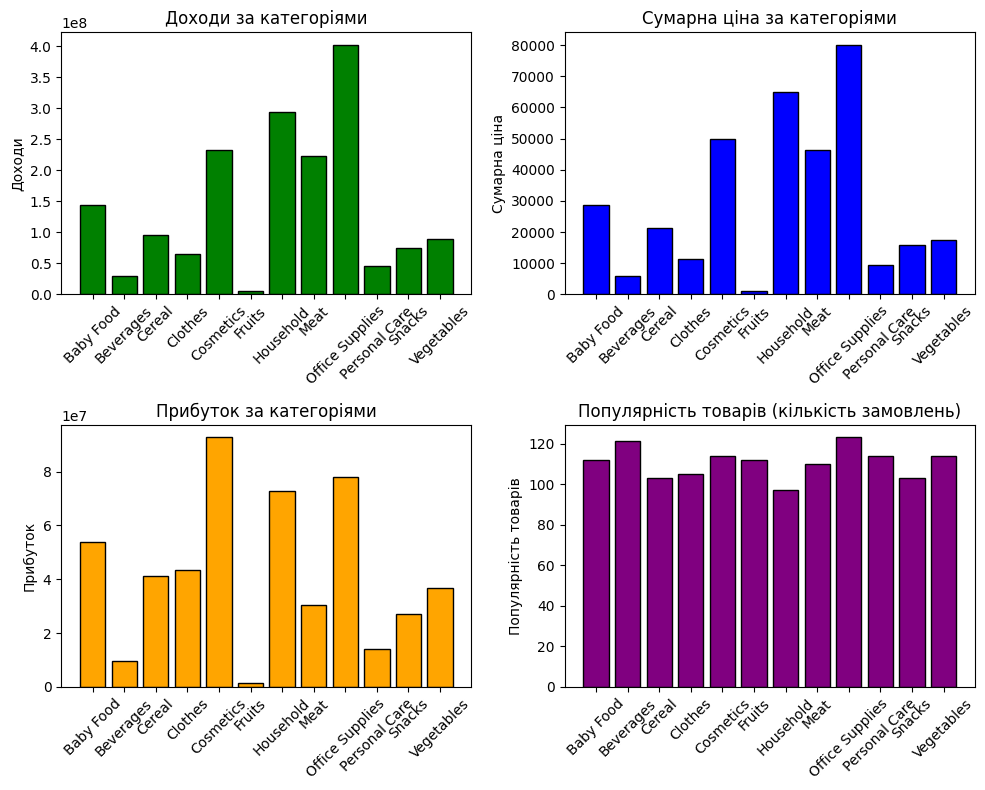

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

ax[0, 0].bar(category_summary_category.index, category_summary_category["Revenue"], color="green", edgecolor="black")
ax[0, 0].set_title("Доходи за категоріями")
ax[0, 0].set_ylabel("Доходи")
ax[0, 0].tick_params(axis='x', rotation=45)

ax[0, 1].bar(category_summary_category.index, category_summary_category["Unit Price"], color="blue", edgecolor="black")
ax[0, 1].set_title("Сумарна ціна за категоріями")
ax[0, 1].set_ylabel("Сумарна ціна")
ax[0, 1].tick_params(axis='x', rotation=45)

ax[1, 0].bar(category_summary_category.index, category_summary_category["Profit"], color="orange", edgecolor="black")
ax[1, 0].set_title("Прибуток за категоріями")
ax[1, 0].set_ylabel("Прибуток")
ax[1, 0].tick_params(axis='x', rotation=45)

ax[1, 1].bar(category_summary_category.index, category_summary_category["Orders"], color="purple", edgecolor="black")
ax[1, 1].set_title("Популярність товарів (кількість замовлень)")
ax[1, 1].set_ylabel("Популярність товарів")
ax[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Проаналізуй продажі (доходи, витрати, прибутки, популярність товарів) та зроби відповідні візуалізації в розрізі країн, регіонів

In [ ]:
res_table["Revenue"] = res_table["Unit Price"] * res_table["Units Sold"]
category_summary_country = res_table.groupby("Country Name").agg({
    "Revenue": "sum",
    "Unit Price": "sum",
    "Profit": "sum",
    "Order ID": "count"
}).rename(columns={"Order ID": "Orders"})

print(category_summary_country)

                            Revenue  Unit Price       Profit  Orders
Country Name                                                        
Albania                 32224853.87     7085.98  10490706.02      21
Andorra                 48963657.01    10029.53  15863262.71      41
Armenia                 38059666.86     7432.49   9587874.48      30
Austria                 41045296.21     8186.19  12314040.02      32
Belarus                 38336759.57     6774.27  13483147.78      29
Belgium                 28161862.70     6630.07   8394441.48      27
Bosnia And Herzegovina  51376443.83    10927.30  13664591.48      37
Bulgaria                39918946.49    10008.52  10902418.85      32
Croatia                 30600724.94     6846.86   8422945.57      19
Cyprus                  33008851.50     6550.63  10032220.56      30
Czech Republic          53851075.68    10824.30  13746590.60      32
Denmark                 27476136.72     5586.60   9773366.42      29
Estonia                 23501631.7

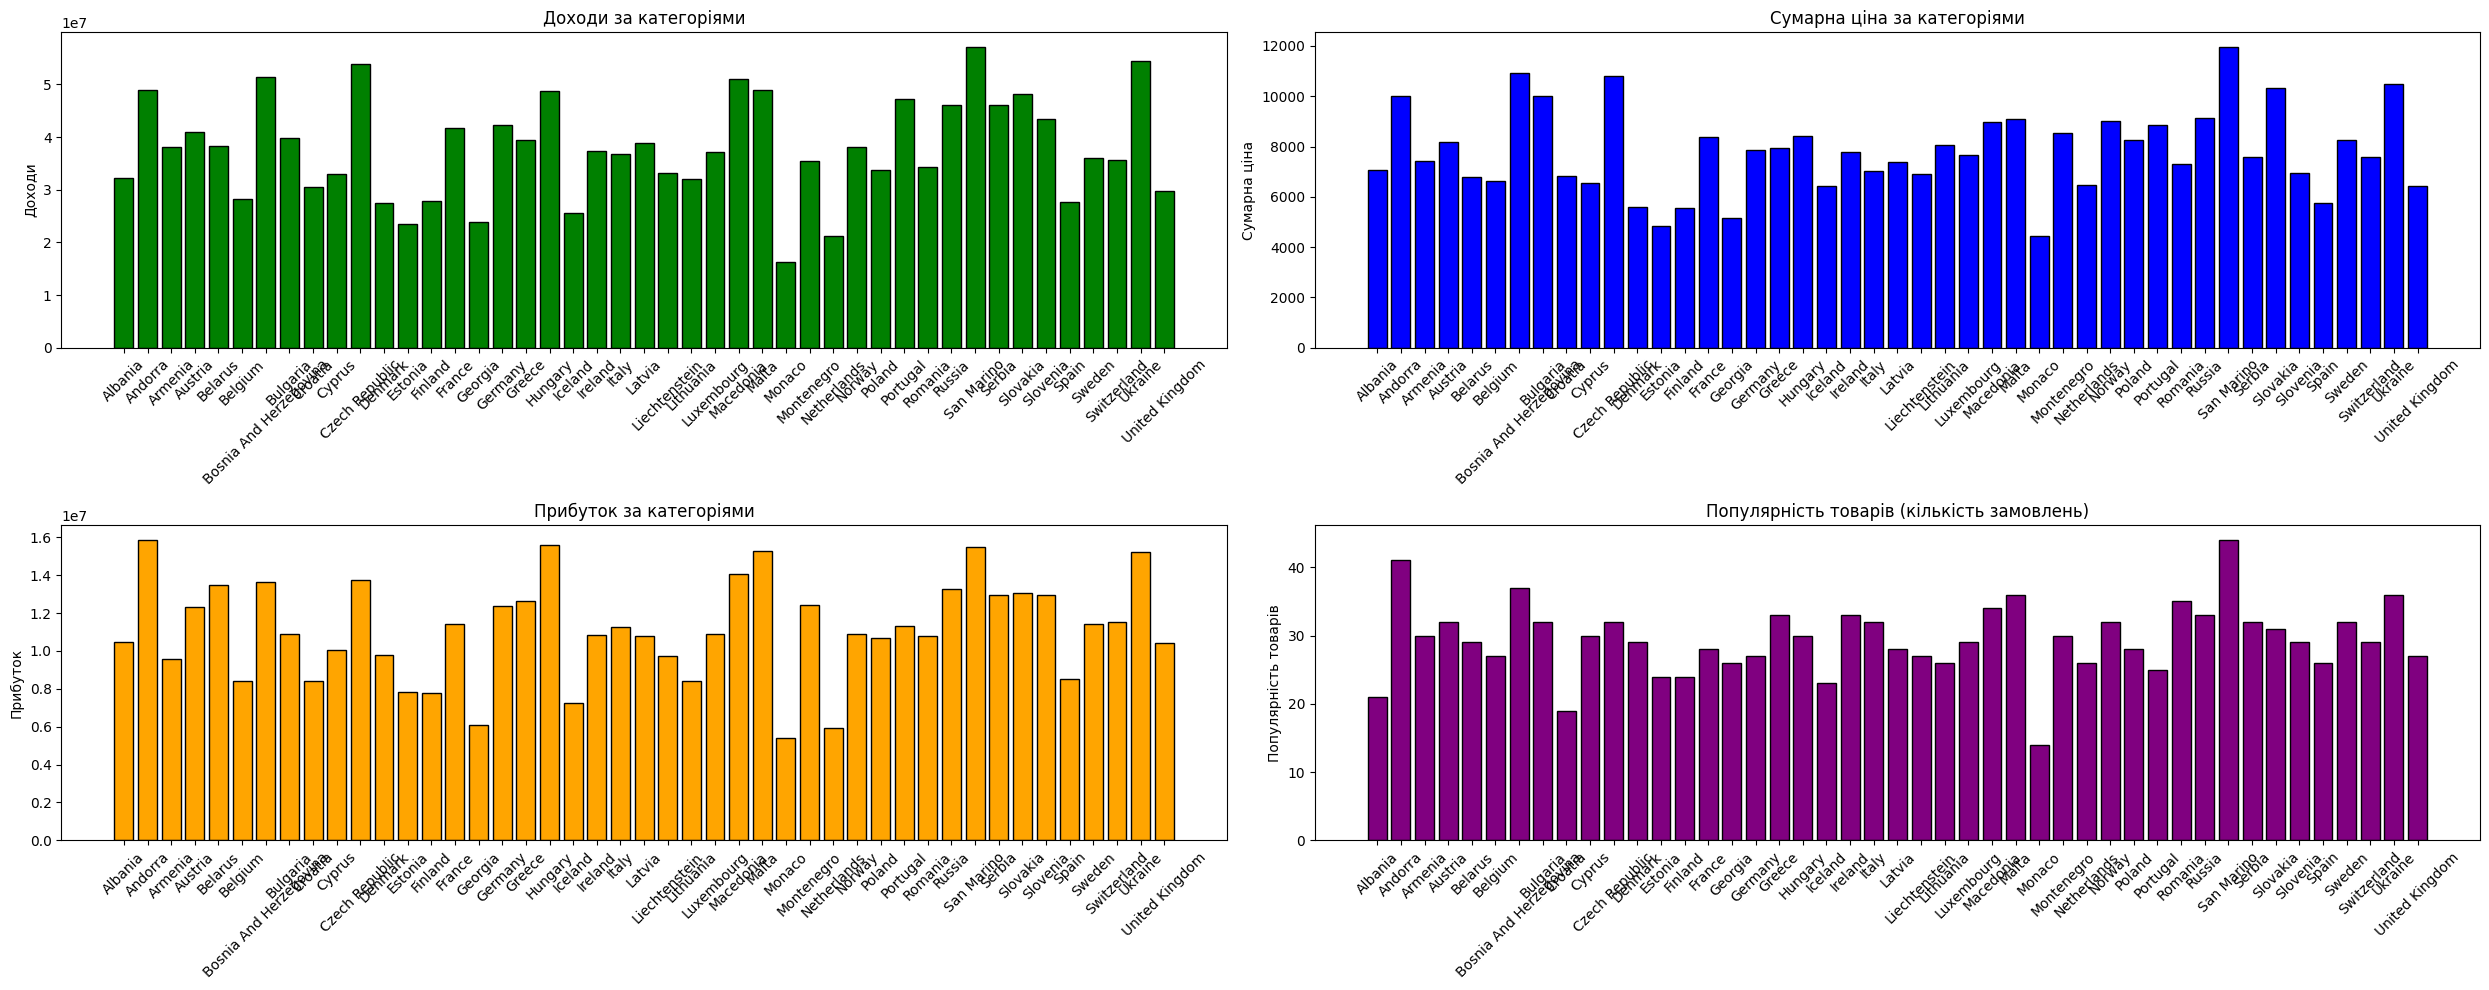

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(25, 10))

ax[0, 0].bar(category_summary_country.index, category_summary_country["Revenue"], color="green", edgecolor="black")
ax[0, 0].set_title("Доходи за категоріями")
ax[0, 0].set_ylabel("Доходи")
ax[0, 0].tick_params(axis='x', rotation=45)

ax[0, 1].bar(category_summary_country.index, category_summary_country["Unit Price"], color="blue", edgecolor="black")
ax[0, 1].set_title("Сумарна ціна за категоріями")
ax[0, 1].set_ylabel("Сумарна ціна")
ax[0, 1].tick_params(axis='x', rotation=45)

ax[1, 0].bar(category_summary_country.index, category_summary_country["Profit"], color="orange", edgecolor="black")
ax[1, 0].set_title("Прибуток за категоріями")
ax[1, 0].set_ylabel("Прибуток")
ax[1, 0].tick_params(axis='x', rotation=45)

ax[1, 1].bar(category_summary_country.index, category_summary_country["Orders"], color="purple", edgecolor="black")
ax[1, 1].set_title("Популярність товарів (кількість замовлень)")
ax[1, 1].set_ylabel("Популярність товарів")
ax[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Проаналізуй продажі (доходи, витрати, прибутки, популярність товарів) та зроби відповідні візуалізації в розрізі регіонів

In [ ]:
res_table["Revenue"] = res_table["Unit Price"] * res_table["Units Sold"]
category_summary_region = res_table.groupby("Region").agg({
    "Revenue": "sum",
    "Unit Price": "sum",
    "Profit": "sum",
    "Order ID": "count"
}).rename(columns={"Order ID": "Orders"})

print(category_summary_region)

             Revenue  Unit Price        Profit  Orders
Region                                                
Asia    9.486943e+07    19154.14  2.571489e+07      86
Europe  1.607260e+09   332650.65  4.757196e+08    1242


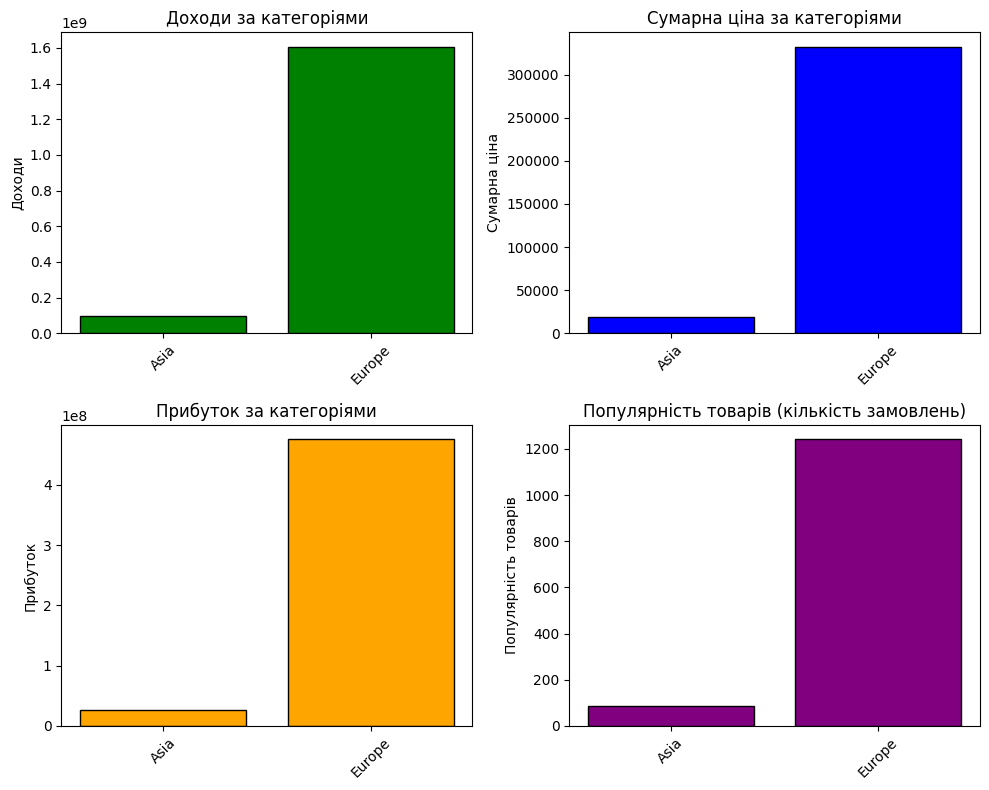

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

ax[0, 0].bar(category_summary_region.index, category_summary_region["Revenue"], color="green", edgecolor="black")
ax[0, 0].set_title("Доходи за категоріями")
ax[0, 0].set_ylabel("Доходи")
ax[0, 0].tick_params(axis='x', rotation=45)

ax[0, 1].bar(category_summary_region.index, category_summary_region["Unit Price"], color="blue", edgecolor="black")
ax[0, 1].set_title("Сумарна ціна за категоріями")
ax[0, 1].set_ylabel("Сумарна ціна")
ax[0, 1].tick_params(axis='x', rotation=45)

ax[1, 0].bar(category_summary_region.index, category_summary_region["Profit"], color="orange", edgecolor="black")
ax[1, 0].set_title("Прибуток за категоріями")
ax[1, 0].set_ylabel("Прибуток")
ax[1, 0].tick_params(axis='x', rotation=45)

ax[1, 1].bar(category_summary_region.index, category_summary_region["Orders"], color="purple", edgecolor="black")
ax[1, 1].set_title("Популярність товарів (кількість замовлень)")
ax[1, 1].set_ylabel("Популярність товарів")
ax[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Проаналізуй продажі (доходи, витрати, прибутки, популярність товарів) та зроби відповідні візуалізації в розрізі каналів продажу

In [ ]:
res_table["Revenue"] = res_table["Unit Price"] * res_table["Units Sold"]
category_summary_channel = res_table.groupby("Sales Channel").agg({
    "Revenue": "sum",
    "Unit Price": "sum",
    "Profit": "sum",
    "Order ID": "count"
}).rename(columns={"Order ID": "Orders"})

print(category_summary_channel)

                    Revenue  Unit Price        Profit  Orders
Sales Channel                                                
Offline        8.717606e+08   174916.57  2.534665e+08     665
Online         8.303688e+08   176888.22  2.479679e+08     663


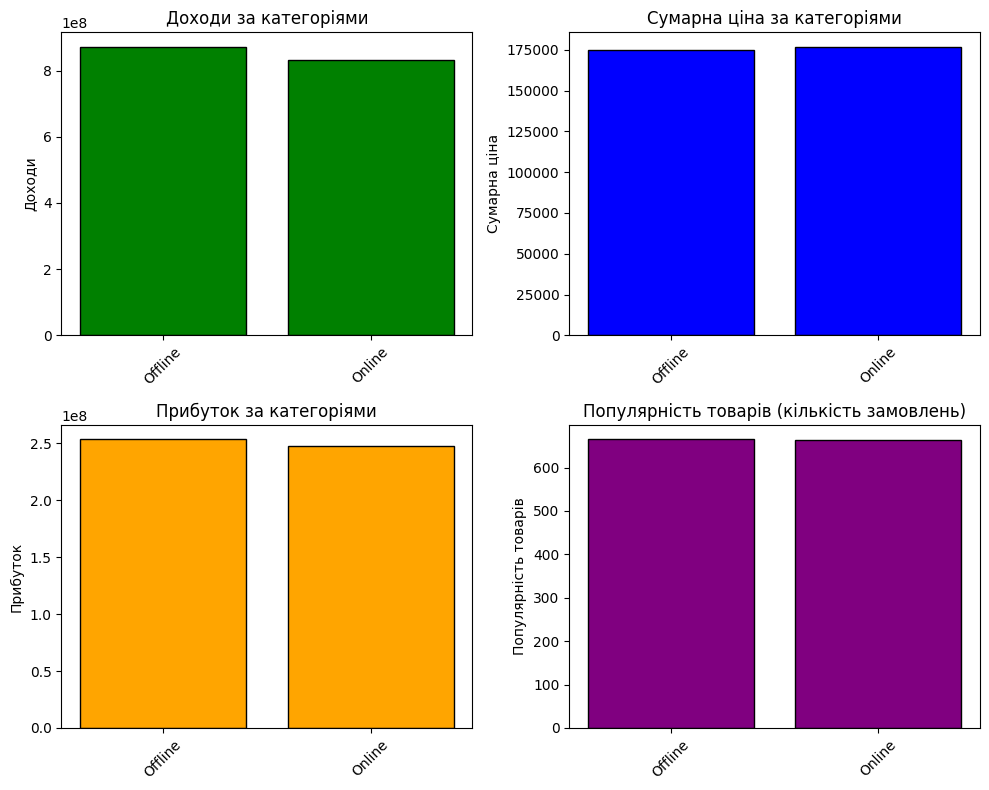

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

ax[0, 0].bar(category_summary_channel.index, category_summary_channel["Revenue"], color="green", edgecolor="black")
ax[0, 0].set_title("Доходи за категоріями")
ax[0, 0].set_ylabel("Доходи")
ax[0, 0].tick_params(axis='x', rotation=45)

ax[0, 1].bar(category_summary_channel.index, category_summary_channel["Unit Price"], color="blue", edgecolor="black")
ax[0, 1].set_title("Сумарна ціна за категоріями")
ax[0, 1].set_ylabel("Сумарна ціна")
ax[0, 1].tick_params(axis='x', rotation=45)

ax[1, 0].bar(category_summary_channel.index, category_summary_channel["Profit"], color="orange", edgecolor="black")
ax[1, 0].set_title("Прибуток за категоріями")
ax[1, 0].set_ylabel("Прибуток")
ax[1, 0].tick_params(axis='x', rotation=45)

ax[1, 1].bar(category_summary_channel.index, category_summary_channel["Orders"], color="purple", edgecolor="black")
ax[1, 1].set_title("Популярність товарів (кількість замовлень)")
ax[1, 1].set_ylabel("Популярність товарів")
ax[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Product Category
Baby Food         26 days 08:08:34.285714285
Beverages         24 days 02:58:30.743801653
Cereal            27 days 04:25:37.864077670
Clothes           23 days 02:30:51.428571428
Cosmetics         25 days 21:53:41.052631579
Fruits            24 days 10:04:17.142857142
Household         23 days 22:30:55.670103092
Meat              25 days 21:49:05.454545454
Office Supplies   26 days 16:58:32.195121951
Personal Care     20 days 18:18:56.842105263
Snacks            25 days 13:02:54.757281553
Vegetables        23 days 11:47:22.105263158
Name: Shipping Days, dtype: timedelta64[ns]


Text(0, 0.5, 'Категорії')

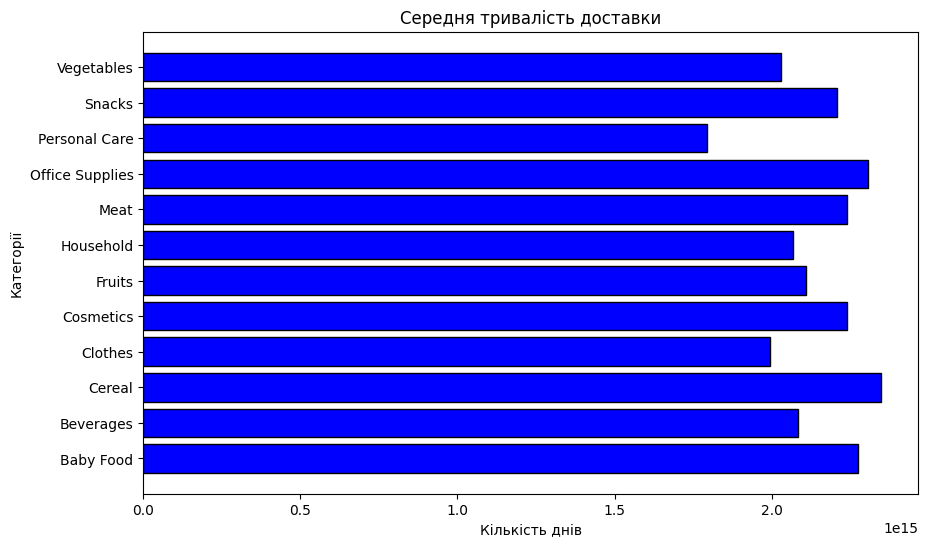

In [ ]:
res_table["Shipping Days"] = res_table['Ship Date'] - res_table['Order Date']

shipping_mean_category = res_table.groupby("Product Category", observed=False)["Shipping Days"].mean()

plt.figure(figsize=(10,6))
plt.barh(shipping_mean_category.index, shipping_mean_category.values, color="blue", edgecolor="black")
plt.title("Середня тривалість доставки")
plt.xlabel("Кількість днів")
plt.ylabel("Категорії")

Text(0, 0.5, 'Категорії')

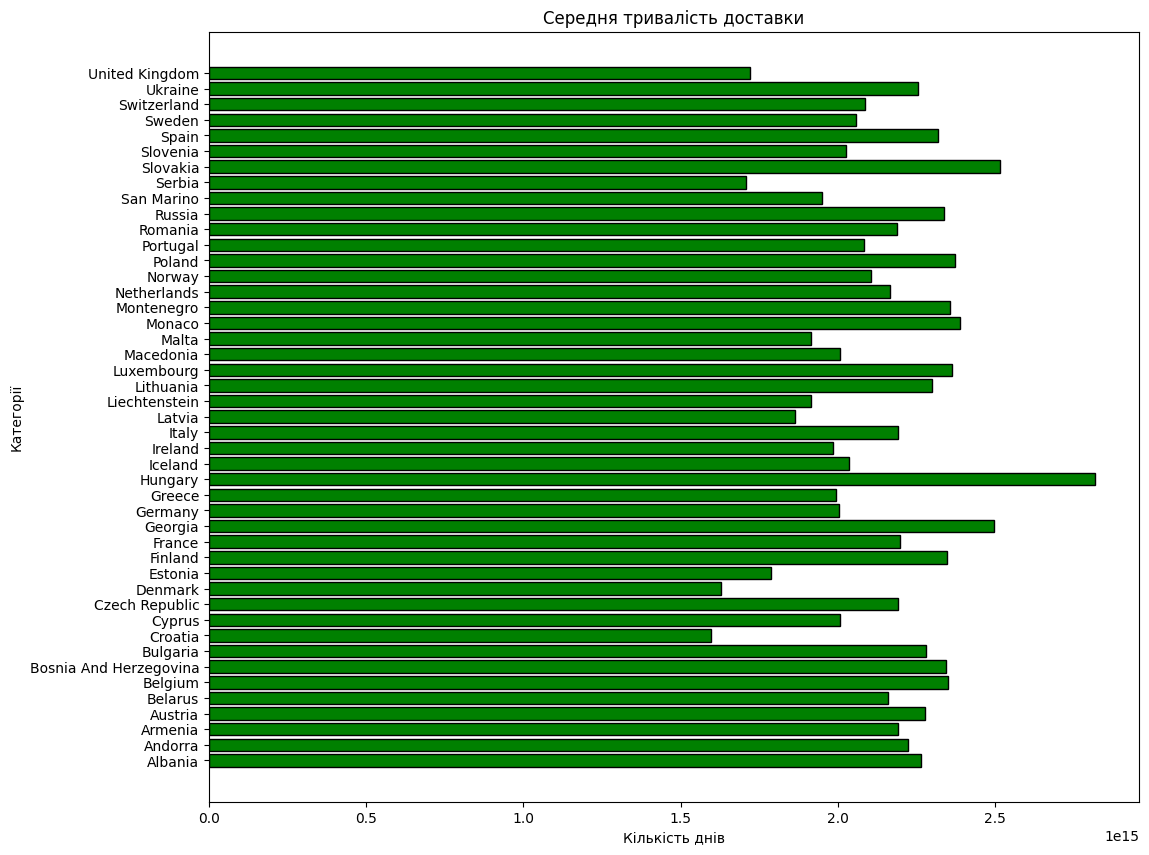

In [ ]:
shipping_mean_country = res_table.groupby("Country Name", observed=False)["Shipping Days"].mean()

plt.figure(figsize=(12,10))
plt.barh(shipping_mean_country.index, shipping_mean_country.values,color="green", edgecolor="black")
plt.title("Середня тривалість доставки")
plt.xlabel("Кількість днів")
plt.ylabel("Категорії")

Text(0, 0.5, 'Категорії')

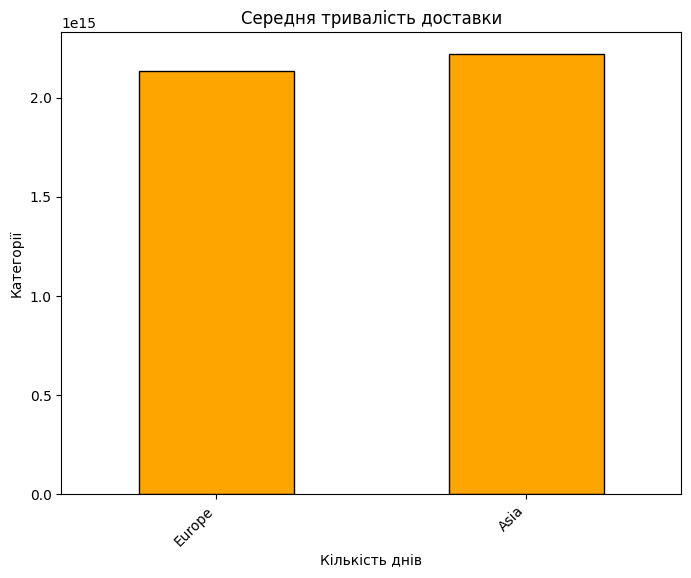

In [ ]:
res_table.groupby("Region", observed=False)["Shipping Days"].mean().sort_values().plot(
    kind="bar", color="orange", edgecolor="black", figsize=(8,6))
plt.title("Середня тривалість доставки")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Кількість днів")
plt.ylabel("Категорії")

Проаналізуй, чи залежить прибуток від часу, необхідного на відвантаження товару.

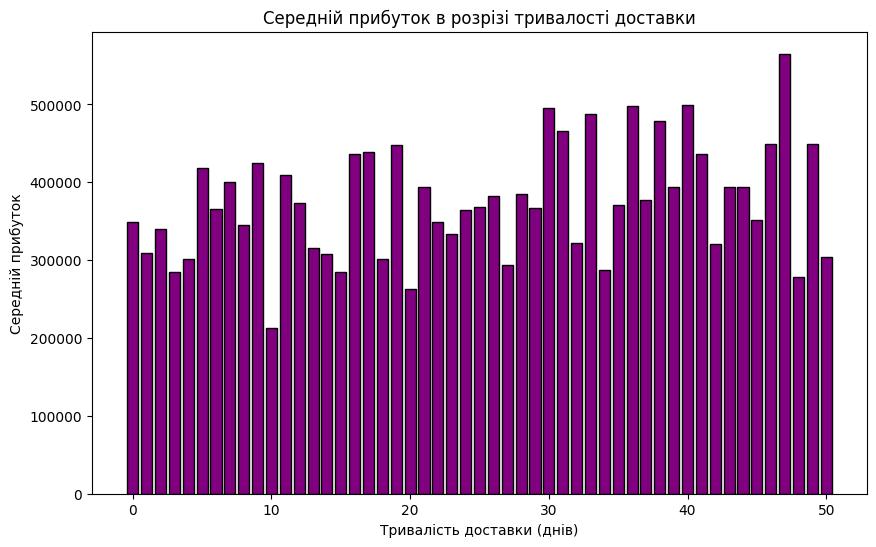

In [ ]:
res_table["Shipping Days"] = (res_table["Ship Date"] - res_table["Order Date"]).dt.days
profit_by_shipping = res_table.groupby("Shipping Days")["Profit"].mean()

plt.figure(figsize=(10,6))
plt.bar(profit_by_shipping.index, profit_by_shipping.values, color="purple", edgecolor = "black")
plt.title("Середній прибуток в розрізі тривалості доставки")
plt.xlabel("Тривалість доставки (днів)")
plt.ylabel("Середній прибуток")

plt.show()

Day
Monday       5111.562189
Tuesday      4744.879121
Wednesday    4644.190722
Thursday     5091.922156
Friday       4922.653409
Saturday     5053.990050
Sunday       5081.975845
Name: Units Sold, dtype: float64


<BarContainer object of 7 artists>

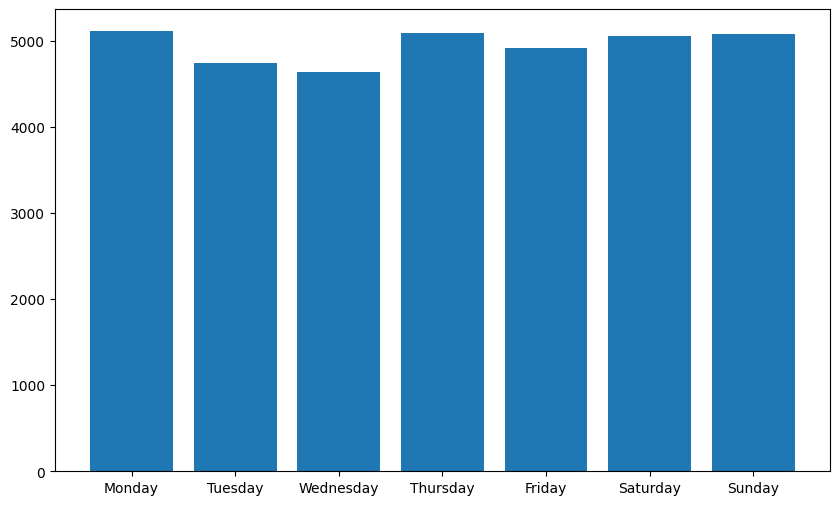

In [ ]:
day_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
selling_by_week = res_table.groupby("Day")["Units Sold"].mean()
selling_by_week = selling_by_week.reindex(day_of_week)
print(selling_by_week)

plt.figure(figsize=(10,6))
plt.bar(selling_by_week.index, selling_by_week.values)

Проаналізуй за допомогою візуалізації динаміку продажів (у часі) у розрізі категорій товарів

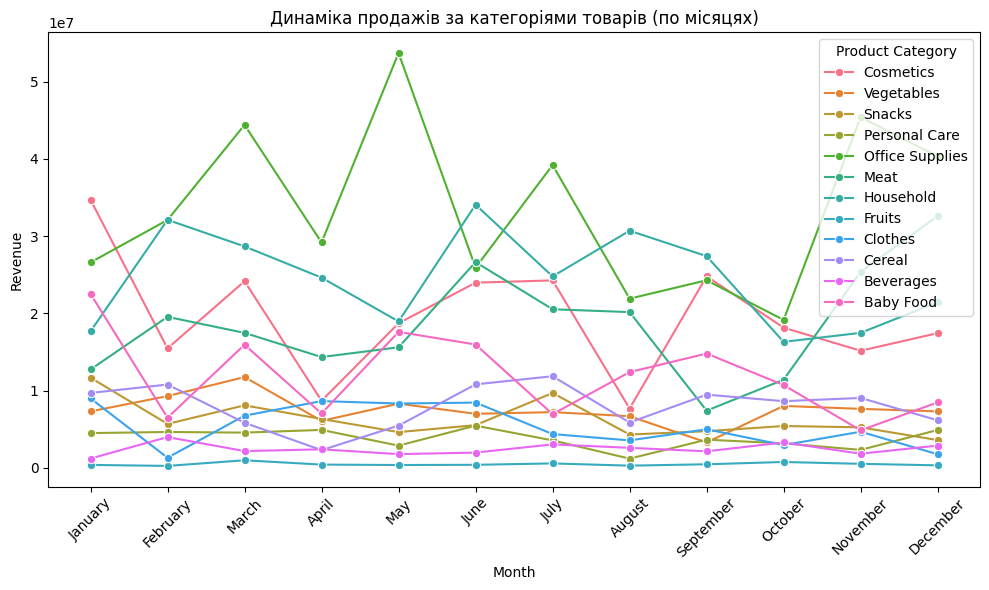

In [ ]:
category_sales = res_table.groupby(["Month", "Product Category"])["Revenue"].sum().reset_index()

month_order = ["January","February","March","April","May","June",
               "July","August","September","October","November","December"]
category_sales["Month"] = pd.Categorical(category_sales["Month"], categories=month_order, ordered=True)

category_sales = category_sales.sort_values("Month")

plt.figure(figsize=(10,6))
sns.lineplot(data=category_sales, x="Month", y="Revenue", hue="Product Category", marker = "o")
plt.title("Динаміка продажів за категоріями товарів (по місяцях)")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.legend(title="Product Category")
plt.tight_layout()
plt.show()

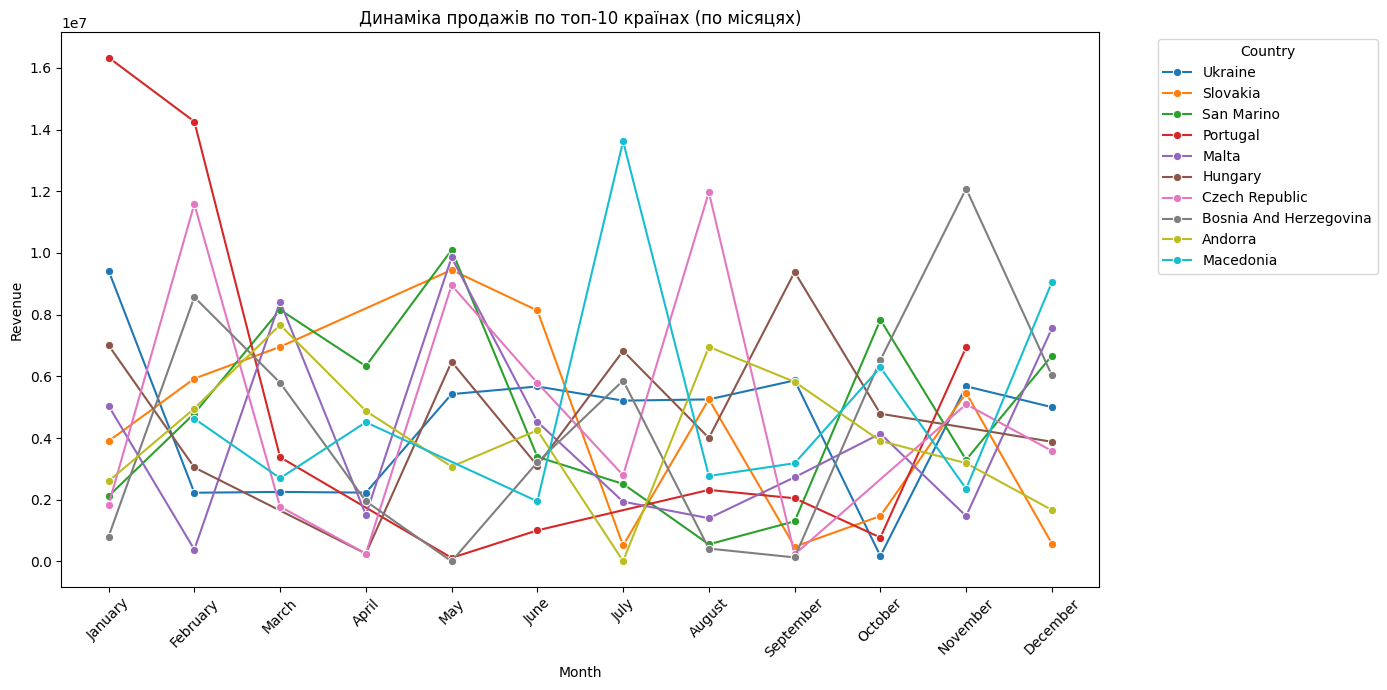

In [ ]:
top_countries = res_table.groupby("Country Name")["Revenue"].sum().nlargest(10).index

country_sales_filtered = res_table[res_table['Country Name'].isin(top_countries)]

country_sales_grouped = country_sales_filtered.groupby(['Month', 'Country Name'])['Revenue'].sum().reset_index()

month_order = ["January","February","March","April","May","June",
               "July","August","September","October","November","December"]
country_sales_grouped['Month'] = pd.Categorical(country_sales_grouped['Month'], categories=month_order, ordered=True)

country_sales_grouped = country_sales_grouped.sort_values('Month')

plt.figure(figsize=(14,7))
sns.lineplot(data=country_sales_grouped, x='Month', y='Revenue', hue='Country Name', marker = "o")
plt.title("Динаміка продажів по топ-10 країнах (по місяцях)")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

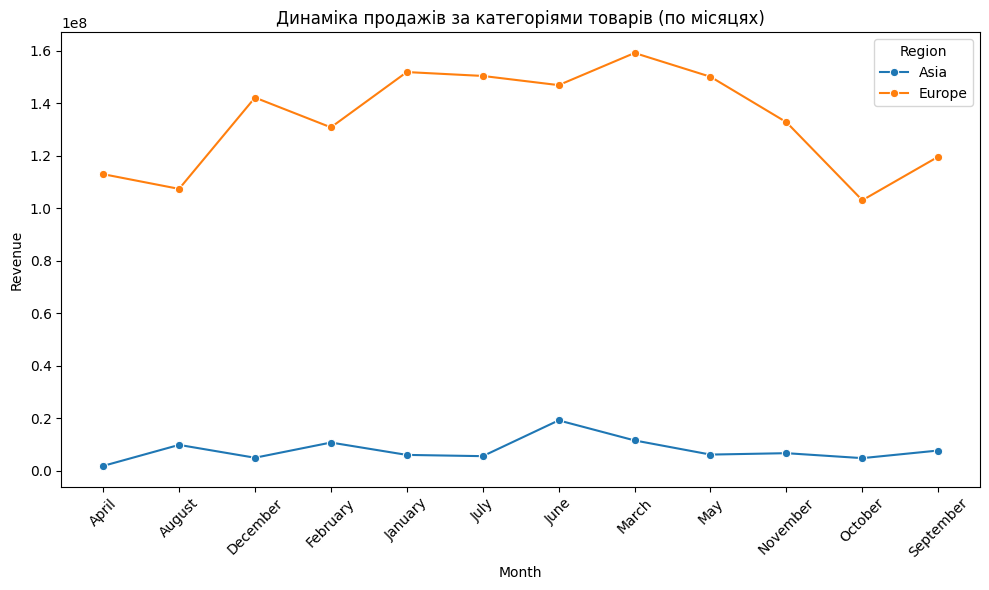

In [ ]:
region_sales = res_table.groupby(["Month", "Region"])["Revenue"].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=region_sales, x="Month", y="Revenue", hue="Region", marker = "o")
plt.title("Динаміка продажів за категоріями товарів (по місяцях)")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.tight_layout()
plt.show()

#Аналіз

##Data overview

Було завантажено три датасети:
1. Events – інформація про замовлення:
- Дата замовлення та отримання (Order Date, Ship Date)
- Пріоритет замовлення (Order Priority)
- Код країни (Country Code)
- Код товару (Product ID)
- Канал замовлення (Sales Channel)
- Дані про продажі: кількість (Units Sold), ціна за одиницю (Unit Price), собівартість (Unit Cost)

2. Countries – інформація про країни:
- Повна назва країни (Country Name)
- Скорочені назви (alpha-2, alpha-3)
- Регіон (Region) та під-регіон (Sub-region)

3. Products – інформація про товари:
- Категорія замовленого товару (Product Category)

З’єднання таблиць:
- Events + Countries → за Country Code (events) та alpha-3 (countries)
- Events + Products → за Product ID (events) та item_type (products)

##Data Cleaning

1. Пропущені значення

Таблиця events мала 6.17% пропусків у полі Country Code.
- Причина: замовник міг не вказувати країну.
- Рішення: заповнення методом ffill().
У інших таблицях відсоток пропусків незначний → рядки видалені.

2. Типи даних
- Order Date та Ship Date → перетворені на тип datetime
- Units Sold → перетворено з float на int

3. Дублікати
- Перевірено на дублікати з урахуванням пробілів та регістру → видалено

4. Аномалії у таблиці events
- Від’ємні, нульові або надто великі значення для кількості → відсутні
- Дата отримання раніше дати замовлення або вихід за межі періоду (2010-01-01 – 2017-07-23) → відсутні
- Коди країн або продуктів, яких немає у відповідних таблицях → відсутні

5. Таблиці countries та products
- Аномалій немає, окрім потенційних дублікатів та пропусків, які вже перевірено

##Data analysis and visualization

1. Об’єднання таблиць
- Використано left join до таблиці events
- Змінено назви колонок:
  - "name" → "Country Name"
  - "region" → "Region"
  - "sub-region" → "Sub-region"
  - "item_type" → "Product Category"
- Видалено непотрібні стовпчики:
  - "Country Code"
  - "Product ID"
  - "alpha-2

2. Обчислення ключових метрик
- Загальна кількість замовлень: 1,328
- Загальний прибуток: 501,434,459
- Загальна кількість охоплених країн: 45
- Загальна кількість проданих товарів: 6,576,524
- Середня вартість замовлення: 76.25

3. Аналіз у розрізі категорій, країн, регіонів та каналів продажу
  
  Було проаналізовано основні метрики:
- Revenue (дохід)
- Unit Price (ціна за одиницю)
- Profit (прибуток)
- Orders (кількість замовлень)

  Аналіз проводився у розрізі:
- Категорій товарів
- Країн
- Регіонів
- Каналів продажу (онлайн/офлайн)


Висновки за категоріями

- Найбільш прибутковою категорією є "Cosmetics", незважаючи на те, що вона не є найпопулярнішою за кількістю замовлень.
- Найбільші доходи приносять категорії "Office Supplies" та "Household".
- Найпопулярнішими категоріями є "Office Supplies" та "Beverages", що вказує на стабільний попит на ці товари.

Висновки за країнами

- Найбільш прибутковими країнами є Андорра, Угорщина та Сан-Марино.
- Найбільші доходи приносять Сан-Марино та Україна.
- Найпопулярнішими країнами є Сан-Марино та Андорра, що вказує на стабільний попит на товари в цих країнах.

Висновки за регіонами

Загалом, аналіз показує, що Європа є ключовим ринком для бізнесу за всіма показниками: доходами, прибутком, сумарною ціною та кількістю замовлень. Її показники значно перевершують показники азіатського регіону, що робить Європу пріоритетним напрямком для подальшого розвитку.

Висновки за каналами продажу

Загалом, аналіз показує, що офлайн-канал є основним джерелом доходів і прибутку, а також має більшу кількість замовлень. Водночас, онлайн-канал демонструє, що в ньому реалізуються товари з трохи вищою середньою ціною. Це свідчить про те, що обидва канали є важливими для бізнесу, але офлайн-канал наразі є більш продуктивним.

4. Аналіз інтервалу часу між замовленням та відвантаженням.

  Було проведено аналіз тривалості доставки (Shipping Days) у розрізі:
- Категорій товарів
- Країн
- Регіонів

Висновок за категоріями

- Найшвидша доставка спостерігається для категорії "Personal Care" з середнім часом доставки приблизно 20.76 дня.
- Найдовший час доставки мають товари з категорії "Cereal", що становить близько 27.18 дня.
- Більшість категорій товарів мають середній час доставки в межах 23-26 днів.

Висновок за країнами

- Найшвидша доставка спостерігається в Хорватії та Данії, з середнім часом доставки приблизно 18.47 та 18.86 дня відповідно.
- Найдовший час доставки мають замовлення, що відправляються до Угорщини, з середнім часом доставки близько 32.60 дня.
- Більшість країн мають середній час доставки в межах 23-27 днів.

Висновок за регіонами

Загалом, аналіз показує, що за регіонами, середня тривалість доставки в Азії трохи більша ніж у Європі.

5. Аналыз залежносты прибутка від часу, необхідного на відвантаження товару

Аналіз показує, що немає прямої залежності між прибутком і часом, необхідним для відвантаження товару. Незважаючи на коливання прибутку, ці зміни не пов'язані з тривалістю доставки. Це означає, що, оптимізація часу відвантаження сама по собі не призведе до збільшення прибутку.

6. Аналіз продажів (у часі) у розрізі категорій товарів, країн, регіонів

За категоріями
- Основними драйверами виручки є Office Supplies та Meat, саме вони формують більшість доходів.
- У категорій Cosmetics, Baby Food, Beverages спостерігаються значні коливання, що може свідчити про чутливість попиту до сезонності чи маркетингових акцій.
- Низка категорій (Fruits, Household) приносить дуже мало доходу, що може свідчити про вузький попит або недостатнє охоплення ринку.

За країнами

Для дослідження було відібрано топ-10 країн за обсягом виручки, оскільки якщо додати на графік усі країни, він буде перенавантажений і важко інтерпретуємий.
- Лідерами за обсягами продажів виступають Португалія та Чехія — саме в них спостерігаються пікові значення виручки у різні місяці.
- У Словаччини та Сан-Марино виручка розподілена більш рівномірно впродовж року, без різких стрибків.
- У низки країн (наприклад, Андорра, Боснія і Герцеговина, Македонія) простежуються сезонні коливання з помітними піками в окремі місяці.
- Україна та Угорщина демонструють середній рівень доходів, але з доволі частими коливаннями.

За регіонами:
- Продажі в Європі демонструють значну стабільність протягом року, з найвищим піком у березні та січні. Спостерігається помітне падіння доходів у серпні та жовтні.
- Продажі в Азії показують значно менші обсяги доходів порівняно з Європою, що може вказувати на менший ринок або інші фактори, що впливають на продажі.
- Найвищий дохід в Азії спостерігався у червні, тоді як найнижчий – у квітні та жовтні.

7. Аналіз продажів товарів за днями тижня

- Найвищі продажі зафіксовано в понеділок та четвер. Це може свідчити про активність клієнтів на початку робочого тижня, що робить ці дні ключовими для бізнесу.
- Найнижчі продажі припадають на середу та вівторок, що робить їх потенційними цілями для маркетингових акцій.
- Вихідні  показують стабільно високі продажі, які знаходяться на рівні середніх показників буднів.